<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/ML_5_19_mikhaylovynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Определение - что подразумевают под ансамблем машинного обучения

Модели бывают "сильными" и "слабыми".
"Сильные" в качестве слабой стороны имеют чаще всего смещение, но хорошую точность, если данные нормальные. "Слабые" - большой разброс и не понятное смещение.
Ансамбль машинного обучения - это метод, при котором несколько моделей машинного обучения обучаются и объединяются для создания более точной и надежной предсказательной модели, чем могла бы предложить каждая модель по отдельности. Основная идея ансамбля состоит в том, чтобы использовать силу множества слабых моделей для получения сильного общего результата.

Существует несколько типов ансамблей машинного обучения, включая бэггинг, бустинг и stacking.

Ансамбли машинного обучения позволяют улучшить точность, устойчивость к шуму и обобщение моделей, помогая создавать более надежные предсказательные модели. Они также могут помочь уменьшить переобучение, поскольку множество слабых моделей сглаживают друг друга, делая результат более стабильным и надежным.



2.Придумайте пример


Один из примеров ансамбля машинного обучения - это комбинация различных алгоритмов для улучшения точности и надежности предсказаний. Например, мы можем использовать случайный лес, который является методом машинного обучения, основанным на деревьях решений, и добавить к нему логистическую регрессию или наивный Байесовский классификатор. Таким образом, мы объединяем силу нескольких алгоритмов, чтобы получить более точные результаты

строим 2 модели энегопотребления: линейную от темпмературы воздуха и давления и изтоническую от температуры. найдем оптимальную взвешенную сумму по обоим

In [1]:
import numpy as np
import pandas as pd

!pip install optuna
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
#from scipy.stats import uniform
from sklearn.metrics import mean_squared_log_error
import sklearn
from sklearn.model_selection import  train_test_split #RandomizedSearchCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.7 MB/s eta 0:00:00


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energy_2.csv')

print(data.head())

             timestamp  meter_reading  air_temperature  cloud_coverage  \
0  2016-01-30 08:00:00        43.6839              8.3             0.0   
1  2016-01-31 05:00:00        37.5408             12.8             0.0   
2  2016-01-31 17:00:00        52.5571             20.6             0.0   
3  2016-04-08 14:00:00        59.3827             21.7             2.0   
4  2016-05-01 19:00:00       448.0000             31.1             0.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_speed  \
0              6.1                0.0              1019.0         2.1   
1             10.0                0.0              1021.9         0.0   
2             11.7                0.0              1020.9         1.5   
3             14.4                0.0              1015.1         3.1   
4             17.2                0.0              1016.1         4.1   

   air_temperature1  wind_direction_sin  wind_direction_cos  hour  
0              -2.3           -0.642788         

In [3]:
# норамлизация данных
data_norm = pd.DataFrame(MinMaxScaler().fit_transform(data[["air_temperature","air_temperature1", "sea_level_pressure"]]))

In [4]:
x = data_norm
x

,0,1,2
0,0.106109,0.556180,0.739726
1,0.250804,0.623596,0.819178
2,0.501608,0.780899,0.791781
3,0.536977,0.842697,0.632877
4,0.839228,0.747191,0.660274
...,...,...,...
5406,0.572347,0.747191,0.813699
5407,0.588424,0.713483,0.794521
5408,0.588424,0.685393,0.797260
5409,0.572347,0.657303,0.797260


In [5]:
#разделеение данный на обучающие и проверочные
train, test, y_train, y_test = train_test_split(data_norm, data["meter_reading"], test_size=0.2)

модели регрессии
линейная и изотоническая

In [6]:
# функция ошибки RMSLE
def rmsle_err(y, y_pred):
  return ((np.log(1 + y) - np.log(1 + y_pred))**2).mean()**0.5


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4328 entries, 766 to 1332
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4328 non-null   float64
 1   1       4328 non-null   float64
 2   2       4328 non-null   float64
dtypes: float64(3)
memory usage: 135.2 KB


In [11]:
train[2] = train[2].interpolate()
#убираем Nan из 2 столбца

In [32]:
y = data['meter_reading']
model1 = LinearRegression().fit(train, y_train)
print('RMSLE: {0:.5}'. format(rmsle_err(y_train, model1.predict(train))))

RMSLE: 0.21907


In [42]:
model2 = IsotonicRegression(out_of_bounds='nan').fit(train[0], y_train)
print('RMSLE: {0:.5}'.format(rmsle_err(y_train, model2.predict(train[0]))))

RMSLE: 0.21547


обьединение моделей

используем Optuna для поиска оптимального коэффицента

In [43]:
def objective(trial):
  alpha = trial.suggest_float('alpha', 1e-10, 1, log=True)
  y_pred = (alpha*model1.predict(test) + (1-alpha)*model2.predict(test[0]))
  return mean_squared_log_error(y_test, y_pred)

In [ ]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)

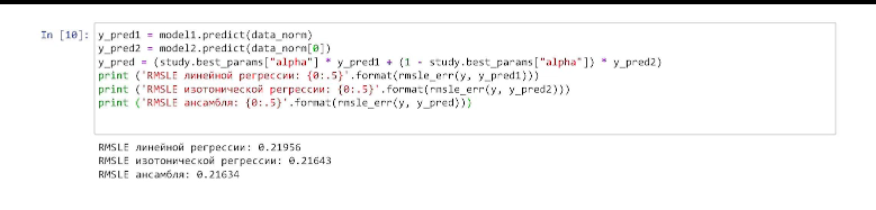

3.Какие ансамбли наиболее распространенные

Бэггинг (Bootstrap Aggregating, Bagging) – это техника, которая объединяет несколько ОДИНАКОВЫХ слабых (как правило моделей), обученных на разных выборках (bootstrap) с последующим усреднением полученных значений. Она уменьшает вариабельность моделей и улучшает общую точность.

Бустинг (Boosting) – это метод, при котором каждое следующее дерево учится исправлять ошибки предыдущего дерева по типу дополнитедьной оптики. Это позволяет улучшить общую точность ансамбля толже использую слабые модели.

Градиентный бустинг (Gradient Boosting) – этот метод строит ансамбль из деревьев решений с наименьшей ошибкой. Он подходит для задач регрессии и классификации.

Стэкинг (Stacking) – это подход, при котором несколько алгоритмов обучаются (уже сильные модели) на одних данных, а затем их предсказания используются как новый набор данных для обучения еще одного алгоритма.

Рандомный лес (Random Forest) – это ансамбль деревьев решений, каждое из которых слегка меняет свои гиперпараметры. Это помогает уменьшить корреляцию между деревьями и улучшить точность.

4.Что подразумеваются под мажоритарным, усредненным и взвешенным голосоыванием при выборе в ансамбль моделей


Мажоритарное, усредненное и взвешенное голосование являются методами определения наиболее подходящей модели из ансамбля моделей.

Мажоритарное голосование: Мажоритарный метод голосования выбирает модель, которая получила большинство голосов от всех моделей в ансамбле. Этот метод прост и эффективен, однако он может быть недостаточно точным, если разница между наиболее и наименее популярными моделями невелика.
Усредненное голосование: Усредненный метод голосования вычисляет среднее значение всех моделей в ансамбле и использует это значение в качестве итоговой модели. Этот подход учитывает вклад каждой модели в ансамбль и может быть полезен, когда все модели имеют примерно одинаковый вес. Однако, усреднение может привести к размыванию информации, если одна или несколько моделей значительно отличаются от остальных.
Взвешенное голосование: Взвешенный метод голосования придает вес каждой модели на основе ее точности или других метрик, и затем вычисляет взвешенную сумму этих весов. Итоговая модель выбирается на основе полученного веса. Этот метод более гибкий, так как позволяет учесть относительную важность каждой модели и может быть использован, когда у вас есть основания полагать, что некоторые модели более точны, чем другие.